In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir('./input')

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [3]:
buro_bal = pd.read_csv('./input/bureau_balance.csv')

In [4]:
buro_bal=pd.concat([buro_bal,pd.get_dummies(buro_bal.STATUS,prefix='bur_bal_status')],axis=1).drop('STATUS',axis=1)#对离散值进行one-hot编码生成了多个标签用于标识对应的状态
buro_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,bur_bal_status_0,bur_bal_status_1,bur_bal_status_2,bur_bal_status_3,bur_bal_status_4,bur_bal_status_5,bur_bal_status_C,bur_bal_status_X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


In [5]:
buro_counts = buro_bal[['SK_ID_BUREAU', 'MONTHS_BALANCE']].groupby('SK_ID_BUREAU').count()
buro_bal['buro_count'] = buro_bal['SK_ID_BUREAU'].map(buro_counts['MONTHS_BALANCE'])#将buro_counts算出来的值映射到buro_count上

In [6]:
#buro_bal

In [7]:
avg_buro_bal = buro_bal.groupby('SK_ID_BUREAU').mean()#做平均

In [8]:
avg_buro_bal.columns=['avg_'+f for f in avg_buro_bal.columns]

In [9]:
#avg_buro_bal.to_csv('avg_bureau_balance',index=False)

In [10]:
buro=pd.read_csv('./input/bureau.csv')

In [11]:
buro=pd.concat([buro,pd.get_dummies(buro.CREDIT_ACTIVE,prefix="ca_")],axis=1).drop('CREDIT_ACTIVE',axis=1)

In [12]:
buro=pd.concat([buro,pd.get_dummies(buro.CREDIT_CURRENCY,prefix='cc_')],axis=1).drop('CREDIT_CURRENCY',axis=1)

In [13]:
buro=pd.concat([buro,pd.get_dummies(buro.CREDIT_TYPE,prefix='ct_')],axis=1).drop('CREDIT_TYPE',axis=1)

In [14]:
buro_full=buro.merge(right=avg_buro_bal.reset_index(),how='left',on='SK_ID_BUREAU',suffixes=('', '_bur_bal'))

In [15]:
nb_bureau_per_curr = buro_full[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').count()

In [16]:
buro_full['SK_ID_BUREAU'] = buro_full['SK_ID_CURR'].map(nb_bureau_per_curr['SK_ID_BUREAU'])

In [17]:
avg_buro = buro_full.groupby('SK_ID_CURR').mean()

In [18]:
avg_buro.head()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,avg_MONTHS_BALANCE,avg_bur_bal_status_0,avg_bur_bal_status_1,avg_bur_bal_status_2,avg_bur_bal_status_3,avg_bur_bal_status_4,avg_bur_bal_status_5,avg_bur_bal_status_C,avg_bur_bal_status_X,avg_buro_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,7.0,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,...,-11.785714,0.336651,0.007519,0.0,0.0,0.0,0.0,0.441240,0.214590,24.571429
100002,8.0,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,...,-21.875000,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,13.750000
100003,4.0,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,2.0,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,3.0,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,...,-3.000000,0.735043,0.000000,0.0,0.0,0.0,0.0,0.128205,0.136752,7.000000


In [19]:
import gc
#del buro,buro_full
gc.collect()

135

In [20]:
prev = pd.read_csv('./input/previous_application.csv')

prev_cat_features = [
    f_ for f_ in prev.columns if prev[f_].dtype == 'object'
]

print('Go to dummies')
prev_dum = pd.DataFrame()
for f_ in prev_cat_features:
    prev_dum = pd.concat([prev_dum, pd.get_dummies(prev[f_], prefix=f_).astype(np.uint8)], axis=1)

prev = pd.concat([prev, prev_dum], axis=1)

del prev_dum
gc.collect()

print('Counting number of Prevs')
nb_prev_per_curr = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prev['SK_ID_PREV'] = prev['SK_ID_CURR'].map(nb_prev_per_curr['SK_ID_PREV'])

print('Averaging prev')
avg_prev = prev.groupby('SK_ID_CURR').mean()
print(avg_prev.head())
del prev
gc.collect()

Go to dummies
Counting number of Prevs
Averaging prev
            SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
SK_ID_CURR                                                         
100001             1.0     3951.000         24835.50    23787.00   
100002             1.0     9251.775        179055.00   179055.00   
100003             3.0    56553.990        435436.50   484191.00   
100004             1.0     5357.250         24282.00    20106.00   
100005             2.0     4813.200         22308.75    20076.75   

            AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_CURR                                                               
100001                2520.0          24835.5                13.000000   
100002                   0.0         179055.0                 9.000000   
100003                3442.5         435436.5                14.666667   
100004                4860.0          24282.0                 5.000000   
100005                446

69

In [21]:
print('Reading POS_CASH')
pos = pd.read_csv('./input/POS_CASH_balance.csv')

print('Go to dummies')
pos = pd.concat([pos, pd.get_dummies(pos['NAME_CONTRACT_STATUS'])], axis=1)

print('Compute nb of prevs per curr')
nb_prevs = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

print('Go to averages')
avg_pos = pos.groupby('SK_ID_CURR').mean()

del pos, nb_prevs
gc.collect()

Reading POS_CASH
Go to dummies
Compute nb of prevs per curr
Go to averages


72

In [22]:
print('Reading CC balance')
cc_bal = pd.read_csv('./input/credit_card_balance.csv')

print('Go to dummies')
cc_bal = pd.concat([cc_bal, pd.get_dummies(cc_bal['NAME_CONTRACT_STATUS'], prefix='cc_bal_status_')], axis=1)

nb_prevs = cc_bal[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
cc_bal['SK_ID_PREV'] = cc_bal['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

print('Compute average')
avg_cc_bal = cc_bal.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]

del cc_bal, nb_prevs
gc.collect()


Reading CC balance
Go to dummies
Compute average


64

In [23]:
print('Reading Installments')
inst = pd.read_csv('./input/installments_payments.csv')
nb_prevs = inst[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
inst['SK_ID_PREV'] = inst['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

avg_inst = inst.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['inst_' + f_ for f_ in avg_inst.columns]

Reading Installments


In [24]:
print('Read data and test')
data = pd.read_csv('./input/application_train.csv')
test = pd.read_csv('./input/application_test.csv')
print('Shapes : ', data.shape, test.shape)

y = data['TARGET']
del data['TARGET']

categorical_feats = [
    f for f in data.columns if data[f].dtype == 'object'
]
categorical_feats
for f_ in categorical_feats:
    data[f_], indexer = pd.factorize(data[f_])
    test[f_] = indexer.get_indexer(test[f_])

data = data.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_pos.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_pos.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

del avg_buro, avg_prev
gc.collect()

Read data and test
Shapes :  (307511, 122) (48744, 121)


78

In [36]:
#data.to_csv('./input_file/final_train_data_true.csv',index=True)
#test.to_csv('./input_file/final_test_data_true.csv',index=True)
#np.save('label.npy',y)

In [42]:
#y.to_csv('./input_file/label_true.csv',index=True)
#data
#np.save('./input_file/data.npy',data.drop('SK_ID_CURR',axis=1))
import pickle
with open('./input_file/testname.pickle','wb')as f:
    pickle.dump(test['SK_ID_CURR'],f)

In [34]:
def train_model(data_, test_, y_, folds_):

    oof_preds = np.zeros(data_.shape[0])#训练集的输出结果
    sub_preds = np.zeros(test_.shape[0])#测试集的输出结果
    
    feature_importance_df = pd.DataFrame()
    
    feats = [f for f in data_.columns if f not in ['SK_ID_CURR']]#得到特征的标签名称
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_)):#划分验证集
        print(val_idx)
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
        
        clf = LGBMClassifier(
            n_estimators=4000,
            learning_rate=0.03,
            num_leaves=30,
            colsample_bytree=.8,
            subsample=.9,
            max_depth=7,
            reg_alpha=.1,
            reg_lambda=.1,
            min_split_gain=.01,
            min_child_weight=2,
            silent=-1,
            verbose=-1,
        )
        
        clf.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100  
               )
        
        oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_[feats], num_iteration=clf.best_iteration_)[:, 1] / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('Full AUC score %.6f' % roc_auc_score(y, oof_preds)) 
    
    test_['TARGET'] = sub_preds

    return oof_preds, test_[['SK_ID_CURR', 'TARGET']], feature_importance_df
    

def display_importances(feature_importance_df_):
    # Plot feature importances
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:50].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('./result/lgbm_importances.png')


def display_roc_curve(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = roc_auc_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    fpr, tpr, thresholds = roc_curve(y_, oof_preds_)
    score = roc_auc_score(y_, oof_preds_)
    plt.plot(fpr, tpr, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LightGBM ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    
    plt.savefig('./result/roc_curve.png')


def display_precision_recall(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = average_precision_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='AP fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    precision, recall, thresholds = precision_recall_curve(y_, oof_preds_)
    score = average_precision_score(y_, oof_preds_)
    plt.plot(precision, recall, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('LightGBM Recall / Precision')
    plt.legend(loc="best")
    plt.tight_layout()
    
    plt.savefig('./result/recall_precision_curve.png')

from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve,average_precision_score,roc_auc_score,precision_recall_curve
gc.enable()
# Build model inputs
#data, test, y = build_model_input()
# Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=546789)
# Train model and get oof and test predictions
oof_preds, test_preds, importances = train_model(data, test, y, folds)
# Save test predictions
test_preds.to_csv('first_submission.csv', index=False)
# Display a few graphs



[     1      5      7 ... 307505 307506 307507]
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.780307	valid_1's auc: 0.761174
[200]	training's auc: 0.801631	valid_1's auc: 0.773462
[300]	training's auc: 0.815753	valid_1's auc: 0.778473
[400]	training's auc: 0.827589	valid_1's auc: 0.780598
[500]	training's auc: 0.837968	valid_1's auc: 0.781621
[600]	training's auc: 0.847551	valid_1's auc: 0.782141
[700]	training's auc: 0.856566	valid_1's auc: 0.782532
[800]	training's auc: 0.864575	valid_1's auc: 0.782758
[900]	training's auc: 0.872062	valid_1's auc: 0.782951
[1000]	training's auc: 0.878676	valid_1's auc: 0.783128
Early stopping, best iteration is:
[988]	training's auc: 0.877852	valid_1's auc: 0.783216
Fold  1 AUC : 0.783216
[     0      2     11 ... 307487 307490 307509]
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.780311	valid_1's auc: 0.76401
[200]	training's auc: 0.802099	valid_1's auc: 0.774747
[300]

KeyboardInterrupt: 

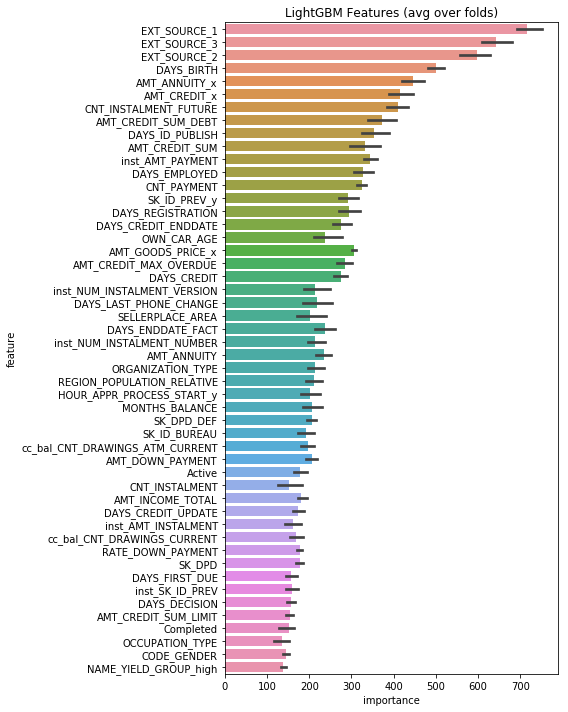

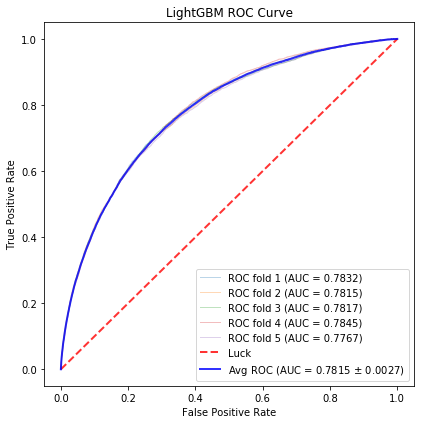

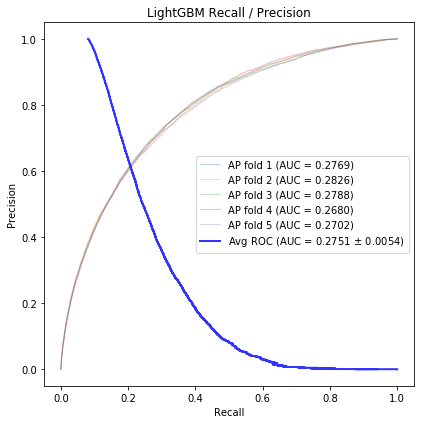

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
folds_idx = [(trn_idx, val_idx) for trn_idx, val_idx in folds.split(data)]
display_importances(feature_importance_df_=importances)
display_roc_curve(y_=y, oof_preds_=oof_preds, folds_idx_=folds_idx)
display_precision_recall(y_=y, oof_preds_=oof_preds, folds_idx_=folds_idx)

In [52]:
# def eval_func(clf,X,y,n_folds=5):
#     from sklearn.cross_validation import KFold
#     kf=KFold(X.shape[0],n_folds=n_folds,random_state=42)
#     eval_value=0
#     for i,(train_index,test_index) in enumerate(kf):
#         X_train,X_val=X[train_index],X[test_index]
#         y_train,y_val=y[train_index],y[test_index]
#         clf=clf
#         clf.fit(X_train,y_train)
#         y_pred=clf.predict(X_val)
#         eval_value+=roc_auc_score(y_val,y_pred)
#         #eval_value+=r2_score(y_val,y_pred)
#         #eval_value+=median_absolute_error(y_val,y_pred)
#     return eval_value/n_folds

In [53]:
# import xgboost as xgb
# def xgboost_classifier(n_estimators, min_child_weigth, colsample_bytree, max_depth,subsample, gamma, alpha):
#     clf=xgb.XGBClassifier(n_estimators=int(n_estimators),
#                          colsample_bytree=max(min(colsample_bytree, 1), 0),
#                          max_depth=int(max_depth),
#                          subsample= max(min(subsample, 1), 0),
#                          gamma=max(gamma, 0),
#                          reg_alpha = max(alpha, 0),
#                          min_child_weight=int(min_child_weigth))
#     return eval_func(clf,X_train,y_train)

In [54]:
# def plot_imp_regular(clf):
#     feature_importance=clf.feature_importances_#获取特征的重要性系数
    
#     feature_importance=100.0*(feature_importance/feature_importance.max())#归一化到0-100
#     sorted_idx=np.argsort(feature_importance)#获取数组从小到大排序的索引
#     pos=np.arange(sorted_idx.shape[0])+.5
#     feature_names=headers
#     plt.barh(pos,feature_importance[sorted_idx],align='center')#设置水平条形图的属性，指标为重要性指数
#     plt.yticks(pos,feature_names[sorted_idx],fontsize=15,family='SimHei')#显示y轴的刻度和每个刻度的名称
#     plt.xlabel('Relative Importance')
#     plt.title('Variable Importance')
#     plt.show()

In [55]:
# def showXgboostResult(params):
#     clf=xgb.XGBClassifier(n_estimators=int(params['n_estimators']),
#                          colsample_bytree=params['colsample_bytree'],
#                          max_depth=int(params['max_depth']),
#                          subsample= params['subsample'],
#                          gamma=params['gamma'],
#                          reg_alpha = params['gamma'],
#                          min_child_weight=int(params['min_child_weigth']))
#     clf.fit(X_train,y_train)
#     y_1 = clf.predictprob(X_test)[:,1]

In [58]:
X_train=data
y_train=np.load('label.npy')
from bayes_opt import BayesianOptimization
xgBO=BayesianOptimization(xgboost_classifier,{'min_child_weigth': (1,120),
                          'colsample_bytree':(0.1, 1),
                          'max_depth':(5, 25),
                          'subsample':(0.5, 1),
                          'n_estimators':(10, 1550),
                          'gamma':(0,10),
                          'alpha':(0, 10)})
xgBO.maximize()
params=xgBO.res['max']['max_params']

Initialization
--------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weigth |   n_estimators |   subsample | 


KeyError: '[ 61503  61504  61505 ... 307508 307509 307510] not in index'